# Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ssl
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download Data

In [2]:
# read data into dataframe
ssl._create_default_https_context = ssl._create_unverified_context
Datagrep=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [14]:
Datagrep=Datagrep.iloc[:,0:834]

# Transform Data

In [15]:
Datagrep

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178611,178638,178648,178689,178745,178769,178809,178850,178873,178879
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274606,274737,274791,274828,274828,274862,274929,275002,275055,275107
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265754,265761,265761,265767,265771,265772,265773,265776,265779,265780
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41013,41013,41013,41013,41349,41349,41349
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656876,656876,656876,656876,656876,657060,657060,657060,657060,657060
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11818,11818,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318984,318984,318984,318984,319316,319431,319431,319594,319594,319594


In [16]:
# list countries and dates
countries_JH=Datagrep['Country/Region'].unique().tolist()
dates_JH=list(Datagrep)[4:]
print(countries_JH[0:4])
print(len(countries_JH))
print(dates_JH[-2:])
print(len(dates_JH))

['Afghanistan', 'Albania', 'Algeria', 'Andorra']
198
['4/29/22', '4/30/22']
830


In [17]:
N=[]
for c in countries_JH:
    L=Datagrep[Datagrep['Country/Region']==c][dates_JH].sum().values.tolist()
    N.append(L)
Data_df=pd.DataFrame(np.array(N).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 

In [18]:
Data_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,178769,274862,265772,41013,99287,11,7571,9072230,422838,5796700,...,895775,238510,6952,522243,10620203,657060,535,11818,319431,247667
826,178809,274929,265773,41013,99287,11,7571,9072230,422855,5847576,...,895775,238535,7054,522263,10631516,657060,535,11818,319431,247729
827,178850,275002,265776,41349,99287,11,7604,9072230,422858,5889356,...,895775,238556,7151,522263,10638632,657060,535,11818,319594,247784
828,178873,275055,265779,41349,99287,11,7626,9072230,422865,5927528,...,897867,238577,7330,522305,10644700,657060,535,11818,319594,247842


In [19]:
Datah_nc=[]
for c in countries_JH:
    L=Data_df[c].to_list()
    L1=[]
    L1.append(L[0])
    for i in range(1,len(L)-1):
        L1.append([L[i+1]-L[i] if L[i+1]-L[i]>=0 else 0][0])
    Datah_nc.append(L1)  
Data_nc=pd.DataFrame(np.array(Datah_nc).T).rename(columns={i:countries_JH[i] for i in range(len(countries_JH))}) 
Df=Data_nc.copy()

In [20]:
Df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,24,34,1,0,0,0,0,0,10,39909,...,0,7,92,9,48431,184,0,0,115,69
825,40,67,1,0,0,0,0,0,17,50876,...,0,25,102,20,11313,0,0,0,0,62
826,41,73,3,336,0,0,33,0,3,41780,...,0,21,97,0,7116,0,0,0,163,55
827,23,53,3,0,0,0,22,0,7,38172,...,2092,21,179,42,6068,0,0,0,0,58


In [21]:
Df['US']

0          1
1          1
2          0
3          3
4          0
       ...  
824    45334
825    88644
826    73346
827    60051
828    23349
Name: US, Length: 829, dtype: int32

In [22]:
Data_df['US']

0             1
1             1
2             2
3             2
4             5
         ...   
825    81101145
826    81189789
827    81263135
828    81323186
829    81346535
Name: US, Length: 830, dtype: int32

# Visualize Data

Text(0.5, 1.0, 'US COVID-19 Cases')

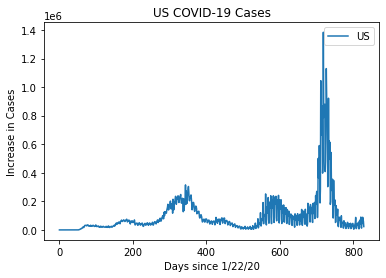

In [23]:
#Data_df['US'].plot()
#Data_df.plot()
#Data_df.plot(y=['US','China'])
Df.plot(y=['US'])
plt.xlabel('Days since 1/22/20')
plt.ylabel('Increase in Cases')
plt.title('US COVID-19 Cases')

# PCA

In [24]:
# scale data
X=Df.values
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [25]:
X_std

array([[-0.57281571, -0.72803237, -0.89738211, ..., -0.5597121 ,
        -0.51584102, -0.37916597],
       [-0.57281571, -0.72803237, -0.89738211, ..., -0.5597121 ,
        -0.51584102, -0.37916597],
       [-0.57281571, -0.72803237, -0.89738211, ..., -0.5597121 ,
        -0.51584102, -0.37916597],
       ...,
       [-0.46397922, -0.56788256, -0.88898498, ..., -0.5597121 ,
        -0.29773915, -0.30942254],
       [-0.51176109, -0.61175922, -0.88898498, ..., -0.5597121 ,
        -0.51584102, -0.30561835],
       [-0.55688842, -0.61395305, -0.89458307, ..., -0.5597121 ,
        -0.51584102, -0.33731991]])

In [26]:
# scale variable
pca=PCA()
X_pca=pca.fit_transform(X_std)

Text(0, 0.5, 'cumulative variance explained')

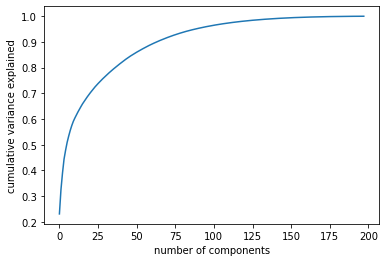

In [27]:
# plot variance of each pc
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance explained')

In [28]:
# find number of components needed to encompass 99% of varaince
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # fit and reduce dimensions
print(pca.n_components_) # print and see how many components are selected

139


In [29]:
pd.DataFrame(pca.components_, columns = Df.columns)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0.007821,0.089139,0.076462,0.068956,0.047252,0.001129,0.062355,0.113470,0.067175,0.095609,...,0.127537,0.071187,0.001045,0.062144,0.028744,0.062866,0.074824,0.044977,0.047078,0.020198
1,0.038740,0.052732,0.075781,0.031780,0.097829,-0.000981,0.023792,0.094490,-0.055724,-0.027911,...,-0.009514,0.069683,-0.076608,0.041552,-0.118059,-0.032063,-0.052798,0.019531,0.123468,0.052588
2,-0.098733,0.017996,-0.115545,0.081399,0.077914,0.009637,0.003268,0.042077,-0.101494,0.148605,...,-0.024943,-0.147054,0.089250,-0.127634,0.079129,-0.061609,-0.066913,-0.077531,0.078762,0.015635
3,0.066475,-0.071743,0.029640,-0.017566,0.032869,0.004227,-0.017398,-0.034844,-0.104785,0.065008,...,-0.051282,0.038603,0.092802,-0.010737,0.150219,-0.046262,-0.050751,-0.069122,0.092557,0.118899
4,0.191312,-0.108080,0.047516,0.022507,-0.072865,-0.016949,-0.044997,0.126788,-0.145951,0.089333,...,0.114929,0.022982,0.052835,0.008324,0.032731,-0.060030,0.036814,-0.061688,0.035199,-0.031518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-0.275196,-0.018400,-0.054150,0.118832,0.099013,-0.017766,0.046500,0.072110,-0.129196,0.006670,...,0.038993,-0.098861,-0.037442,-0.032813,-0.009763,-0.018608,0.020935,0.029350,0.112093,0.028242
135,0.123578,-0.093089,0.063199,-0.058546,0.095406,0.041239,0.002805,-0.009016,0.034621,0.004417,...,-0.040621,0.041615,-0.000362,-0.004127,-0.086053,-0.096903,0.042396,0.080376,0.006784,-0.046296
136,0.133205,-0.200089,-0.074327,0.000243,0.111427,0.009238,-0.004015,0.060806,0.027237,0.038161,...,0.037566,0.224775,-0.003801,-0.057037,0.125171,0.115380,-0.014888,-0.086810,0.076552,0.065698
137,-0.005234,-0.041799,-0.066661,-0.023969,0.062502,0.026357,0.115406,0.085768,0.038491,-0.047558,...,0.048698,-0.040434,-0.022716,-0.120851,0.068561,0.128807,0.093068,-0.013564,-0.061067,-0.039409


In [30]:
n_pcs= pca.n_components_ # get number of components
n_pcs=50

# get index of most important feature on each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = Df.columns

# get most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [31]:
n_pcs

50

In [32]:
most_important_names

['Denmark',
 'Singapore',
 'Iran',
 'Malaysia',
 'Syria',
 'Philippines',
 'Hungary',
 'Algeria',
 'Guinea',
 'Saudi Arabia',
 'Kiribati',
 'United Arab Emirates',
 'Timor-Leste',
 'Eswatini',
 'Sweden',
 'Taiwan*',
 'Burundi',
 'Saint Vincent and the Grenadines',
 'Taiwan*',
 'Burundi',
 'Summer Olympics 2020',
 'El Salvador',
 'El Salvador',
 'Gabon',
 'Micronesia',
 'Somalia',
 'Saint Vincent and the Grenadines',
 'Central African Republic',
 'Central African Republic',
 'Tanzania',
 'Nicaragua',
 'Cameroon',
 'Equatorial Guinea',
 'Antarctica',
 'MS Zaandam',
 'Lesotho',
 'MS Zaandam',
 'MS Zaandam',
 'Central African Republic',
 'Marshall Islands',
 'Holy See',
 'Lesotho',
 'Diamond Princess',
 'Equatorial Guinea',
 'Marshall Islands',
 'Nicaragua',
 'Honduras',
 'Bahamas',
 'Liberia',
 'Honduras']

# Regression

In [33]:
# define URL where data is located
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# read in data
data_full = pd.read_csv(url)

# view first six rows of data
data_full[0:6]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/22,4/24/22,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178648,178689,178745,178769,178809,178850,178873,178879,178899,178901
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274791,274828,274828,274862,274929,275002,275055,275107,275167,275177
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265761,265767,265771,265772,265773,265776,265779,265780,265782,265782
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41013,41013,41013,41013,41013,41349,41349,41349,41349,41349
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11


Text(0.5, 1.0, 'US')

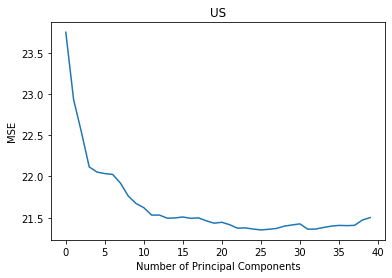

In [34]:
# define predictor and response variables
X = Df
y = Df[['US']]

# scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

# define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [37]:
# find error at specified number of pcs
score = -1*model_selection.cross_val_score(regr, 
                       X_reduced[:,:31], y, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

1890877307.536788


In [38]:
regr = LinearRegression()
regr.fit(X_reduced[:,:31], y)

pred = regr.predict(X_reduced[:,:31])

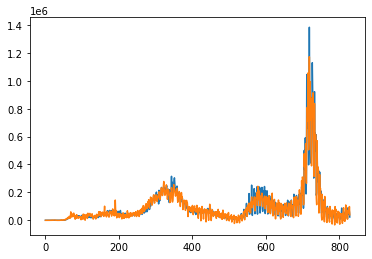

In [39]:
plt.plot(y)
plt.plot(pred)
plt.show()

In [40]:
print(len(y))

print(X_reduced.shape)

829
(829, 198)


In [41]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 23.1 ,  32.55,  39.03,  44.45,  47.89,  50.94,  53.37,  55.57,
        57.47,  59.09,  60.4 ,  61.61,  62.77,  63.87,  64.92,  65.94,
        66.85,  67.75,  68.6 ,  69.44,  70.23,  71.  ,  71.76,  72.47,
        73.15,  73.79,  74.42,  75.05,  75.64,  76.22,  76.79,  77.35,
        77.9 ,  78.43,  78.96,  79.47,  79.97,  80.46,  80.95,  81.42,
        81.89,  82.36,  82.82,  83.26,  83.69,  84.11,  84.51,  84.89,
        85.27,  85.64,  86.  ,  86.35,  86.69,  87.03,  87.36,  87.68,
        88.  ,  88.32,  88.62,  88.92,  89.2 ,  89.48,  89.75,  90.02,
        90.28,  90.54,  90.79,  91.03,  91.27,  91.51,  91.74,  91.97,
        92.19,  92.4 ,  92.61,  92.81,  93.01,  93.2 ,  93.39,  93.57,
        93.75,  93.92,  94.09,  94.26,  94.42,  94.57,  94.72,  94.87,
        95.01,  95.15,  95.29,  95.42,  95.55,  95.68,  95.8 ,  95.92,
        96.04,  96.15,  96.26,  96.37,  96.48,  96.58,  96.68,  96.78,
        96.88,  96.97,  97.06,  97.15,  97.24,  97.32,  97.4 ,  97.48,
      

In [42]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

84287.74525320246

# PCA  Prediction 

In [43]:
# shift variables 1 week

lag=7
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

829
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [44]:
print(y[-(lag+1):])
print(y_shift[-(lag+1):])

        US
821  19650
822  12365
823  69238
824  45334
825  88644
826  73346
827  60051
828  23349
          US
821  23349.0
822      NaN
823      NaN
824      NaN
825      NaN
826      NaN
827      NaN
828      NaN


In [45]:
print(X_shift.shape)
print(y_shift.shape)

(829, 198)
(829, 1)


In [46]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [47]:
print(X_shift.shape)
print(Xall.shape)
print(yall.shape)
print(X_reduced.shape)

(829, 198)
(829, 198)
(829, 1)
(829, 198)


In [48]:
print(type(Xall))
print(type(X_reduced))
print(type(yall))
X_trainreduced=X_reduced[0:-lag-lag,:]
y_train=yall.iloc[0:-lag-lag,:].to_numpy()
print(type(X_trainreduced))
print(X_trainreduced.shape)
print(type(y_train))
print(y_train.shape)
X_testreduced=X_reduced[-(lag+lag+1):-lag,:]
y_test=yall.iloc[-(lag+lag+1):-lag,:].to_numpy()
print(type(X_testreduced))
print(X_testreduced.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(815, 198)
<class 'numpy.ndarray'>
(815, 1)
<class 'numpy.ndarray'>
(8, 198)
(8, 1)


Text(0.5, 1.0, 'US')

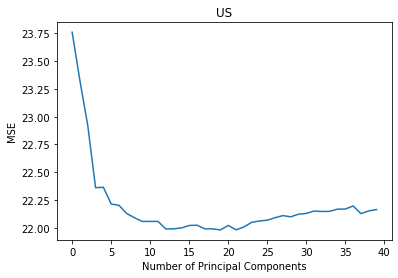

In [49]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [58]:
# calculate MSE at specified number of pcs
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:19], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

3516511808.7586365


In [59]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:19], y_train)

trainpred = regr.predict(X_trainreduced[:,:19])

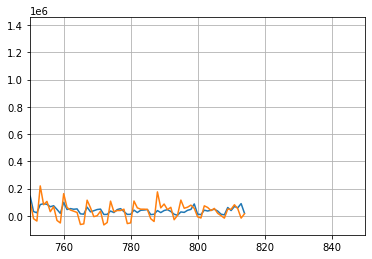

In [62]:
# plot prediction and data
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(750, 850)
plt.grid()
plt.show()

In [63]:
predres = regr.predict(X_testreduced[:,:19])
print(predres)
print(y_test)

[[ 15057.61081165]
 [-20587.42504354]
 [ 17180.54225079]
 [ 97760.44016709]
 [ 46946.53447284]
 [ 70970.4811207 ]
 [ 59650.66696553]
 [  2448.23858626]]
[[19650.]
 [12365.]
 [69238.]
 [45334.]
 [88644.]
 [73346.]
 [60051.]
 [23349.]]


In [64]:
asx=np.linspace(len(yall)-lag-lag-1,len(yall)-1-lag,lag+1)

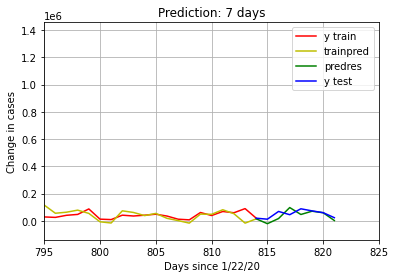

In [74]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 7 days")
plt.xlabel("Days since 1/22/20")
plt.ylabel("Change in cases")
plt.xlim(795, 825)
plt.grid() 
plt.show()

In [75]:
# shift data 30 days
lag=30
X_shift=X
y_shift=y.shift(periods=-lag)
print(len(y_shift))
print(type(y))
print(type(y_shift))

829
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [76]:
# define predictor and response variables
Xall = X_shift
yall = y_shift

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(Xall))

In [77]:
X_trainreduced=X_reduced[0:-lag-lag,:]
y_train=yall.iloc[0:-lag-lag,:].to_numpy()
X_testreduced=X_reduced[-(lag+lag+1):-lag,:]
y_test=yall.iloc[-(lag+lag+1):-lag,:].to_numpy()

Text(0.5, 1.0, 'US')

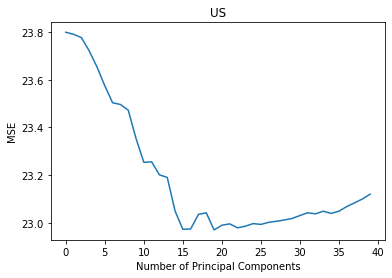

In [78]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_trainreduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 40):
    score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(np.log(mse))
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('US')

In [85]:
score = -1*model_selection.cross_val_score(regr, 
                       X_trainreduced[:,:15], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
print(score)

9483113860.102947


In [86]:
regr = LinearRegression()
regr.fit(X_trainreduced[:,:15], y_train)

#calculate RMSE
trainpred = regr.predict(X_trainreduced[:,:15])

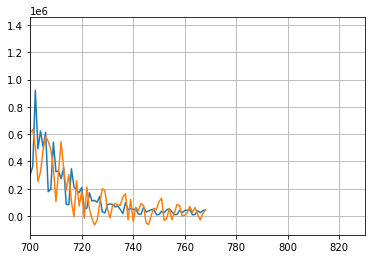

In [88]:
plt.plot(y_train)
plt.plot(trainpred)
plt.xlim(700,830)
plt.grid()
plt.show()

In [89]:
predres = regr.predict(X_testreduced[:,:15])

In [90]:
asx=np.linspace(len(yall)-lag-1-lag,len(yall)-1-lag,lag+1)

In [91]:
predres = regr.predict(X_testreduced[:,:15])
print(predres)
print(y_test)

[[ 43801.23450567]
 [ 34760.51329375]
 [ 37574.541885  ]
 [ 96763.67314454]
 [ 27404.04402949]
 [ 27619.13713121]
 [ 65837.28714329]
 [ 76279.05175375]
 [ 96497.15479708]
 [155262.28001085]
 [147152.38858096]
 [115396.87148277]
 [ 54137.58824841]
 [115270.59107831]
 [132653.6813811 ]
 [198319.59885514]
 [202306.24707398]
 [179129.24815898]
 [188827.1142128 ]
 [110755.86007559]
 [258903.26084067]
 [207655.35075609]
 [286261.71515584]
 [267608.88662482]
 [275119.42982545]
 [108579.46148948]
 [184354.18418014]
 [270822.18914855]
 [196417.16247166]
 [297012.41714298]
 [235559.02747013]]
[[45637.]
 [32218.]
 [11810.]
 [ 4757.]
 [28913.]
 [25601.]
 [40950.]
 [47387.]
 [87590.]
 [12654.]
 [ 9459.]
 [41780.]
 [35694.]
 [41566.]
 [48960.]
 [35441.]
 [12321.]
 [ 7501.]
 [61390.]
 [39245.]
 [68900.]
 [59522.]
 [90019.]
 [19650.]
 [12365.]
 [69238.]
 [45334.]
 [88644.]
 [73346.]
 [60051.]
 [23349.]]


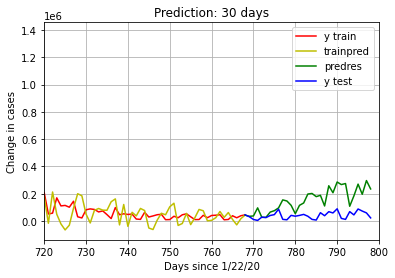

In [94]:
plt.plot(y_train, "-r", label='y train')
plt.plot(trainpred, "-y", label='trainpred')
plt.plot(asx,predres, "-g", label='predres')
plt.plot(asx,y_test, "-b", label='y test')
plt.legend(('y train','trainpred', 'predres', 'y test'))
plt.legend(loc = "upper right")
plt.title("Prediction: 30 days")
plt.xlabel("Days since 1/22/20")
plt.ylabel("Change in cases")
plt.xlim(720, 800)
plt.grid()
plt.show()

# Appendix